# **Data:**

In [1]:
import pandas as pd
import numpy as np


In [2]:
# User data
user_df = pd.read_csv("Netflix Userbase.csv")
# Eliminates NA values
user_df.dropna()


,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month


In [3]:
# Content (Movies/shows) dataset
content_df = pd.read_csv("netflix_titles.csv")
# Eliminates NA values
content_df.dropna()
content_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


# **Data Exploration/Cleaning:**

In [4]:
content_df.dropna(inplace=True)

In [5]:
# Clean the titles of the columns
content_df = content_df.rename(columns= {"listed_in": "Genre",
                            "show_id": "Show ID",
                            "type": "Type",
                            "title": "Title",
                            "director": "Director",
                            "cast": "Cast",
                            "country": "Country",
                            "date_added": "Date Added",
                            "release_year": "Release Year",
                            "rating": "Age Rating",
                            "duration": "Duration",
                            "description": "Description",
                            })

In [6]:
print(content_df.columns)

Index(['Show ID', 'Type', 'Title', 'Director', 'Cast', 'Country', 'Date Added',
       'Release Year', 'Age Rating', 'Duration', 'Genre', 'Description'],
      dtype='object')


In [7]:
print(user_df.columns)

Index(['User ID', 'Subscription Type', 'Monthly Revenue', 'Join Date',
       'Last Payment Date', 'Country', 'Age', 'Gender', 'Device',
       'Plan Duration'],
      dtype='object')


In [8]:
# This function converts seasons into minutes and also gets rid of any str values such as 'min'
def converting_duration(duration):
    if isinstance(duration, str):  # Check if it's a string
        if 'min' in duration:
            return int(duration.replace(' min', ''))  # Extract and convert minutes
        elif 'Season' in duration:
            seasons = int(duration.replace(' Seasons', '').replace(' Season', ''))
            return seasons * 8 * 40  # Assuming 8 episodes/season and 40 minutes/episode
    return None  # Return None for invalid or missing values

# Apply conversion function to the Duration column
content_df['Duration (minutes)'] = content_df['Duration'].apply(converting_duration)

content_df

,Show ID,Type,Title,Director,Cast,Country,Date Added,Release Year,Age Rating,Duration,Genre,Description,Duration (minutes)
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2880
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,104
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,127
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,166
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,96
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",158
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,88
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",88


In [9]:
# Filtering the User dataset to only relevant columns
relevant_user_data = user_df.loc[:,["User ID", "Subscription Type", "Country", "Device"]]
relevant_user_data

,User ID,Subscription Type,Country,Device
0,1,Basic,United States,Smartphone
1,2,Premium,Canada,Tablet
2,3,Standard,United Kingdom,Smart TV
3,4,Standard,Australia,Laptop
4,5,Basic,Germany,Smartphone
...,...,...,...,...
2495,2496,Premium,Spain,Smart TV
2496,2497,Basic,Spain,Smart TV
2497,2498,Standard,United States,Laptop
2498,2499,Standard,Canada,Tablet


In [10]:
# Filtering the Content dataset to only relevant columns
relevant_content_data = content_df.loc[:, ["Show ID",'Type', "Title","Duration (minutes)", "Country"]]
relevant_content_data

,Show ID,Type,Title,Duration (minutes),Country
7,s8,Movie,Sankofa,125,"United States, Ghana, Burkina Faso, United Kin..."
8,s9,TV Show,The Great British Baking Show,2880,United Kingdom
9,s10,Movie,The Starling,104,United States
12,s13,Movie,Je Suis Karl,127,"Germany, Czech Republic"
24,s25,Movie,Jeans,166,India
...,...,...,...,...,...
8801,s8802,Movie,Zinzana,96,"United Arab Emirates, Jordan"
8802,s8803,Movie,Zodiac,158,United States
8804,s8805,Movie,Zombieland,88,United States
8805,s8806,Movie,Zoom,88,United States


# **Test Recommendations**

**Device**: This recommendation system is based on the device type. For example, users with a TV will be recommended longer shows/movies compared to users with a Smartphone.

In [11]:
def recommend_movies(user_id, relevant_user_data, relevant_content_data):
    user_info = relevant_user_data[relevant_user_data['User ID'] == user_id].iloc[0]

    # Filter by device type
    if user_info['Device'] == 'Smart TV':
        # longer movies and tv shows since it's TV
        recommended_movies = relevant_content_data[relevant_content_data['Duration (minutes)'] > 100]
    elif user_info['Device'] == 'Smartphone':
       # shorter movies since it's mobile
        recommended_movies = relevant_content_data[relevant_content_data['Duration (minutes)'] <=100 ]
    else:
        # Recommends both short and long content
        recommended_movies = relevant_content_data


    return recommended_movies[['Show ID', 'Title']]


In [12]:
user_id_to_recommend = 5 # Enter User ID
recommended_by_device = recommend_movies(user_id_to_recommend, relevant_user_data, relevant_content_data)
print(f"Recommended Movies for User {user_id_to_recommend}:\n", recommended_by_device)

Recommended Movies for User 5:
      Show ID                                              Title
28       s29                                         Dark Skies
38       s39                                Birth of the Dragon
43       s44                                             Jaws 3
44       s45                                  Jaws: The Revenge
51       s52  InuYasha the Movie 2: The Castle Beyond the Lo...
...      ...                                                ...
8793   s8794                               Yours, Mine and Ours
8794   s8795                                             اشتباك
8801   s8802                                            Zinzana
8804   s8805                                         Zombieland
8805   s8806                                               Zoom

[2592 rows x 2 columns]


**Device and Country**: This recommendation system built upon the previous recommendation system (device), this includes recommendations based on device type and also the country that the user lives in.

In [13]:
def recommend_movies_by_country(user_id, relevant_user_data, relevant_content_data):
    # Get user information
    user_info = relevant_user_data[relevant_user_data['User ID'] == user_id].iloc[0]

    # Filter recommendations based on device type
    if user_info['Device'] == 'Smart TV':
        # Recommend longer movies and shows for Smart TV users
        recommend_movies_by_country = relevant_content_data[relevant_content_data['Duration (minutes)'] > 100]
    elif user_info['Device'] == 'Smartphone':
        # Recommend shorter movies for mobile users
        recommend_movies_by_country = relevant_content_data[relevant_content_data['Duration (minutes)'] <= 100]
    else:
        # Recommend both short and long content for other devices
        recommend_movies_by_country = relevant_content_data

    # Further filter recommendations based on country
    recommend_movies_by_country = recommend_movies_by_country[relevant_content_data['Country'] == user_info['Country']]

    # Return the final filtered list of recommendations
    return recommend_movies_by_country[['Show ID', 'Title', 'Country']]


In [14]:
user_id_for_country = 7 # Enter User ID
recommended_movies_country = recommend_movies_by_country(user_id_for_country, relevant_user_data, relevant_content_data)
print(f"Recommended Movies for User {user_id_for_country}:\n", recommended_movies_country)

Recommended Movies for User 7:
      Show ID                                              Title Country
650     s651                               O Vendedor de Sonhos  Brazil
783     s784                                           Carnaval  Brazil
966     s967                                      Get the Grift  Brazil
1188   s1189                                       Get the Goat  Brazil
1403   s1404                                         Double Dad  Brazil
1532   s1533                            Anitta: Made In Honório  Brazil
1601   s1602                             Just Another Christmas  Brazil
1715   s1716                                    A Queen Is Born  Brazil
1771   s1772                                Afronta! Facing It!  Brazil
1798   s1799                                       Alice Junior  Brazil
2050   s2051                          Afonso Padilha: Classless  Brazil
2302   s2303                              Thiago Ventura: POKAS  Brazil
2563   s2564            Luccas N

# **Clustering**:

In [15]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [16]:
new_revised_user_df =  user_df.loc[:,["User ID","Age" ,"Subscription Type", "Country", "Device"]]
new_revised_user_df

,User ID,Age,Subscription Type,Country,Device
0,1,28,Basic,United States,Smartphone
1,2,35,Premium,Canada,Tablet
2,3,42,Standard,United Kingdom,Smart TV
3,4,51,Standard,Australia,Laptop
4,5,33,Basic,Germany,Smartphone
...,...,...,...,...,...
2495,2496,28,Premium,Spain,Smart TV
2496,2497,33,Basic,Spain,Smart TV
2497,2498,38,Standard,United States,Laptop
2498,2499,48,Standard,Canada,Tablet


Clustering by Device and Age:

In [17]:
# Transforming Categorical values (Device type and Country)
device_encoder = OneHotEncoder(sparse_output=False)
device_encoded_data = device_encoder.fit_transform(new_revised_user_df[['Device', 'Country']])
print(device_encoded_data)

[[0. 0. 1. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 1. 0.]
 ...
 [1. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 1.]]


In [18]:
device_encoded_columns = device_encoder.get_feature_names_out(['Device', 'Country'])
device_encoded_columns

array(['Device_Laptop', 'Device_Smart TV', 'Device_Smartphone',
       'Device_Tablet', 'Country_Australia', 'Country_Brazil',
       'Country_Canada', 'Country_France', 'Country_Germany',
       'Country_Italy', 'Country_Mexico', 'Country_Spain',
       'Country_United Kingdom', 'Country_United States'], dtype=object)

In [19]:
# Combining encoded data with encoded columns
processed_data = pd.DataFrame(device_encoded_data, columns= device_encoded_columns)
processed_data["Age"] = user_df["Age"]
processed_data

,Device_Laptop,Device_Smart TV,Device_Smartphone,Device_Tablet,Country_Australia,Country_Brazil,Country_Canada,Country_France,Country_Germany,Country_Italy,Country_Mexico,Country_Spain,Country_United Kingdom,Country_United States,Age
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,28
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,42
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,28
2496,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,33
2497,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,38
2498,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48


In [20]:
# Scaling the transformed data
scaler = StandardScaler()
device_scaled_data = scaler.fit_transform(processed_data)
device_scaled_data

array([[-0.58412474, -0.56811207,  1.73947259, ..., -0.28103637,
         2.1314871 , -1.50559043],
       [-0.58412474, -0.56811207, -0.5748869 , ..., -0.28103637,
        -0.46915602, -0.52934705],
       [-0.58412474,  1.76021608, -0.5748869 , ...,  3.55825831,
        -0.46915602,  0.44689633],
       ...,
       [ 1.71196309, -0.56811207, -0.5748869 , ..., -0.28103637,
         2.1314871 , -0.11095703],
       [-0.58412474, -0.56811207, -0.5748869 , ..., -0.28103637,
        -0.46915602,  1.28367636],
       [-0.58412474,  1.76021608, -0.5748869 , ..., -0.28103637,
         2.1314871 , -0.52934705]])

To run a KMeans cluster we need to determine the optimal number of clusters needed for the clustering. Using the elbow method will help us determine the optimal number of clusters.

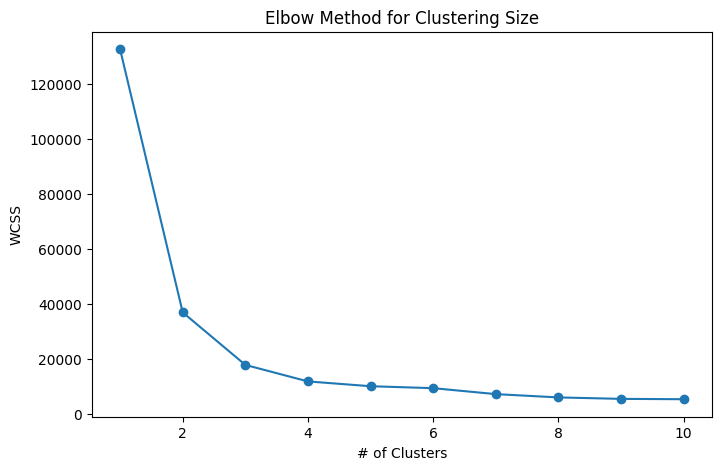

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

wcss = []

# Testing clusters from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(processed_data)  # Ensure 'user_data' is preprocessed (e.g., standardized)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

# Graph to determine where the elbow is
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method for Clustering Size")
plt.xlabel("# of Clusters")
plt.ylabel("WCSS")
plt.show()

Based on the graph it looks like the optimal number of clusters is 3-4. Since our device options are 4, I will choose 4.

In [22]:
# Clustering through K-Means
kmeans = KMeans(n_clusters = 4, random_state = 42)
user_df['Cluster_by_device'] = kmeans.fit_predict(device_scaled_data)
user_df

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Cluster_by_device
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month,3
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month,1
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month,2
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month,3
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month,0
...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month,0
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month,0
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month,3
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month,1


In [23]:
user_df[['User ID', "Device",'Cluster_by_device']]

,User ID,Device,Cluster_by_device
0,1,Smartphone,3
1,2,Tablet,1
2,3,Smart TV,2
3,4,Laptop,3
4,5,Smartphone,0
...,...,...,...
2495,2496,Smart TV,0
2496,2497,Smart TV,0
2497,2498,Laptop,3
2498,2499,Tablet,1


In [24]:
# This shows the information based on clusters
user_df.groupby('Cluster_by_device').get_group(1)

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Cluster_by_device
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month,1
6,7,Standard,12,09-12-21,25-06-23,Brazil,46,Male,Tablet,1 Month,1
11,12,Premium,15,23-03-23,28-06-23,Canada,45,Male,Tablet,1 Month,1
15,16,Premium,15,07-04-22,27-06-23,France,36,Male,Tablet,1 Month,1
19,20,Basic,10,27-05-23,22-06-23,Italy,41,Male,Tablet,1 Month,1
...,...,...,...,...,...,...,...,...,...,...,...
2474,2475,Basic,12,05-09-22,11-07-23,Germany,37,Female,Tablet,1 Month,1
2475,2476,Basic,13,31-08-22,15-07-23,France,28,Male,Tablet,1 Month,1
2483,2484,Standard,11,29-07-22,13-07-23,Canada,50,Female,Smart TV,1 Month,1
2486,2487,Premium,11,25-07-22,12-07-23,Canada,35,Male,Smart TV,1 Month,1


In [25]:
# Device Preference by Cluster
device_counts = user_df.groupby(['Cluster_by_device', 'Device']).size().unstack(fill_value=0)
device_percentage = device_counts.div(device_counts.sum(axis=1), axis=0) * 100
print("Device Preferences by Cluster (Counts):\n", device_counts)
print("\nDevice Preferences by Cluster (Percentage):\n", device_percentage)

Device Preferences by Cluster (Counts):
 Device             Laptop  Smart TV  Smartphone  Tablet
Cluster_by_device                                      
0                     107       126         396     116
1                      64        78          80     350
2                      44       290          46      52
3                     421       116          99     115

Device Preferences by Cluster (Percentage):
 Device                Laptop   Smart TV  Smartphone     Tablet
Cluster_by_device                                             
0                  14.362416  16.912752   53.154362  15.570470
1                  11.188811  13.636364   13.986014  61.188811
2                  10.185185  67.129630   10.648148  12.037037
3                  56.058589  15.446072   13.182423  15.312916


<Figure size 1000x500 with 0 Axes>

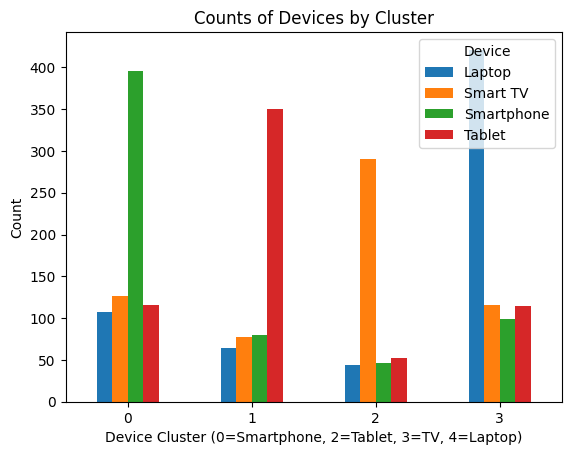

In [26]:
# Barplot for count of devices by cluster
plt.figure(figsize=(10, 5))
device_counts.plot(kind='bar', title='Counts of Devices by Cluster')
plt.xlabel('Device Cluster (0=Smartphone, 2=Tablet, 3=TV, 4=Laptop)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Clustering by Subscription and Age:

In [27]:
# Transforming Categorical values (Subscription Type)
subscription_encoder = OneHotEncoder(sparse_output=False)
subscription_encoded_data = subscription_encoder.fit_transform(new_revised_user_df[['Subscription Type']])
print(subscription_encoded_data)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]]


In [28]:
subscription_encoded_columns = subscription_encoder.get_feature_names_out(['Subscription Type'])
subscription_encoded_columns

array(['Subscription Type_Basic', 'Subscription Type_Premium',
       'Subscription Type_Standard'], dtype=object)

In [29]:
# Combining encoded data with encoded columns
processed_data2 = pd.DataFrame(subscription_encoded_data, columns= subscription_encoded_columns)
processed_data2["Age"] = user_df["Age"]
processed_data2

,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Age
0,1.0,0.0,0.0,28
1,0.0,1.0,0.0,35
2,0.0,0.0,1.0,42
3,0.0,0.0,1.0,51
4,1.0,0.0,0.0,33
...,...,...,...,...
2495,0.0,1.0,0.0,28
2496,1.0,0.0,0.0,33
2497,0.0,0.0,1.0,38
2498,0.0,0.0,1.0,48


In [30]:
# Scaling the transformed data
subscription_scaled_data = scaler.fit_transform(processed_data2)
subscription_scaled_data

array([[ 1.22576609, -0.64407095, -0.6658964 , -1.50559043],
       [-0.81581634,  1.55262397, -0.6658964 , -0.52934705],
       [-0.81581634, -0.64407095,  1.50173511,  0.44689633],
       ...,
       [-0.81581634, -0.64407095,  1.50173511, -0.11095703],
       [-0.81581634, -0.64407095,  1.50173511,  1.28367636],
       [ 1.22576609, -0.64407095, -0.6658964 , -0.52934705]])

In [31]:
# Clustering subscription type into 3 clusters
kmeans2 = KMeans(n_clusters = 3, random_state = 42)
user_df['Cluster_by_subscription'] = kmeans2.fit_predict(subscription_scaled_data)
user_df

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Cluster_by_device,Cluster_by_subscription
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month,3,0
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month,1,2
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month,2,1
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month,3,1
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month,0,2
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month,0,0
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month,3,1
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month,1,1


In [32]:
# Subscription Preference by Cluster
subscription_counts = user_df.groupby(['Cluster_by_subscription', 'Subscription Type']).size().unstack(fill_value=0)
subscription_percentage = subscription_counts.div(subscription_counts.sum(axis=1), axis=0) * 100
print("Subscription Type by Cluster (Counts):\n", subscription_counts)
print("\nSubscription Type by Cluster (Percentage):\n", subscription_percentage)

Subscription Type by Cluster (Counts):
 Subscription Type        Basic  Premium  Standard
Cluster_by_subscription                          
0                          999        0         0
1                            0        0       768
2                            0      733         0

Subscription Type by Cluster (Percentage):
 Subscription Type        Basic  Premium  Standard
Cluster_by_subscription                          
0                        100.0      0.0       0.0
1                          0.0      0.0     100.0
2                          0.0    100.0       0.0


<Figure size 1000x500 with 0 Axes>

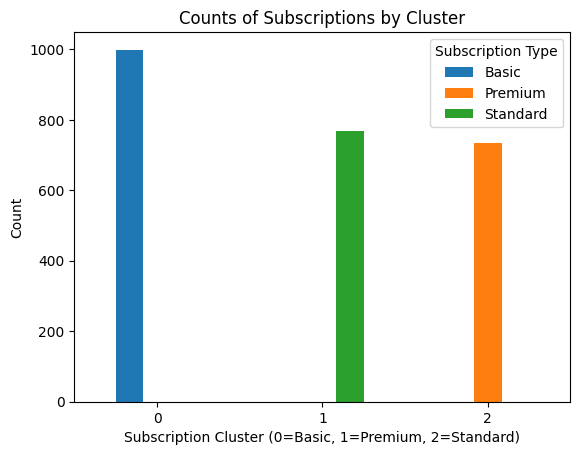

In [33]:
plt.figure(figsize=(10, 5))
subscription_counts.plot(kind='bar', title='Counts of Subscriptions by Cluster')
plt.xlabel('Subscription Cluster (0=Basic, 1=Premium, 2=Standard)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

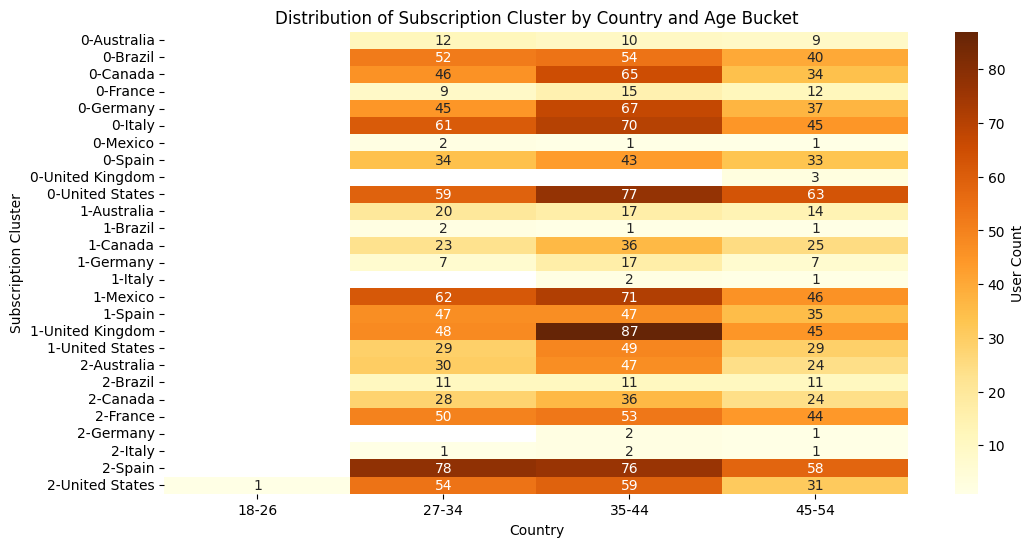

In [45]:
# Distribution of Subscription Cluster by Country and Age Bucket
plt.figure(figsize=(12, 6))
sub_country_age_heatmap_data = user_df.groupby(['Cluster_by_subscription', 'Country', 'Age Bucket']).size().unstack()
sns.heatmap(sub_country_age_heatmap_data, annot=True, cmap="YlOrBr", cbar_kws={'label': 'User Count'})
plt.title("Distribution of Subscription Cluster by Country and Age Bucket")
plt.xlabel("Country")
plt.ylabel("Subscription Cluster")
plt.show()

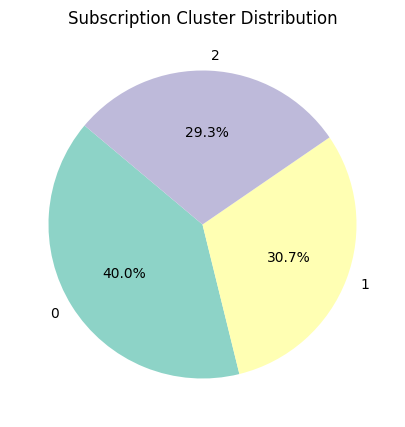

In [48]:
# Pie chart of subscription cluster distribution
plt.figure(figsize=(8, 5))
subscription_counts = user_df['Cluster_by_subscription'].value_counts()
plt.pie(subscription_counts, labels=subscription_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3"))
plt.title("Subscription Cluster Distribution")
plt.show()

Recommendation Based on Clusters:

In [34]:
# Creating Age Buckets to segment customers by Age
def age_bucket(age):
    if age < 27:
        return '18-26'
    elif 27 <= age < 35:
        return '27-34'
    elif 35 <= age < 45:
        return '35-44'
    elif 45 <= age < 55:
        return '45-54'
    else:
        return '55+'

user_df['Age Bucket'] = user_df['Age'].apply(age_bucket)

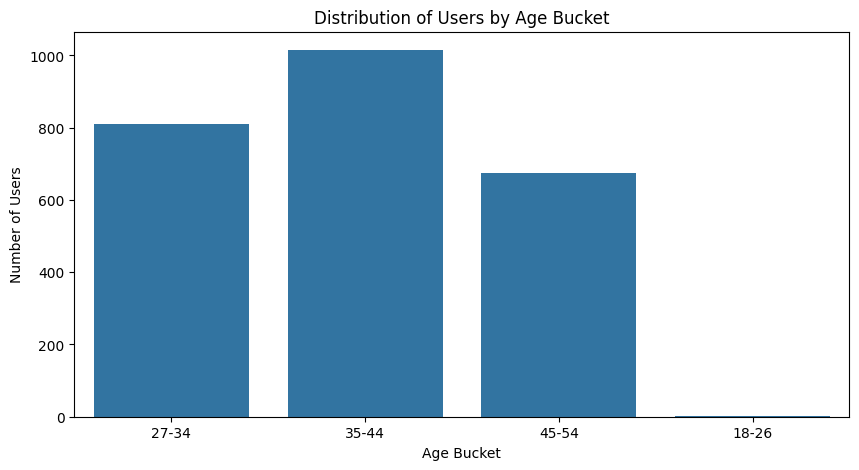

In [35]:
# Assuming 'Age Bucket' is a categorical column in user_df
plt.figure(figsize=(10, 5))
sns.countplot(data=user_df, x='Age Bucket')
plt.title('Distribution of Users by Age Bucket')
plt.xlabel('Age Bucket')
plt.ylabel('Number of Users')
plt.show()


In [36]:
user_df

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Cluster_by_device,Cluster_by_subscription,Age Bucket
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month,3,0,27-34
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month,1,2,35-44
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month,2,1,35-44
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month,3,1,45-54
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month,0,0,27-34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month,0,2,27-34
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month,0,0,27-34
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month,3,1,35-44
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month,1,1,45-54


# **Main Recommendation system:**

This recommendation system has multiple filters based on the clusters
- The data is clustered by subscription type, with cluster 0 being Basic, cluster 1 being premium, and cluster 2 being standard. (Premium members will be recommended longer and recent content, basic members will be recommended older and shorter content)
- It recommends shows/movies based on device type. Clusters with device types such as TV will be recommended longer content and clusters with smartphones will be recommended shorter content. (cluster 0 has mainly smartphone users, cluster 1 has mainly tablet users, cluster 2 has mainly Smart TV users, cluster 3 has mainly Laptop users)
- It also recommends based on country, the users will be recommended content based on their countries.
- If a user receives fewer than 5 recommendations, they will fill that threshold by being recommended content that is similar their features.

In [37]:
def recommend_based_on_clusters(user_id, user_df, content_df):
  # user information
  user_info = user_df[user_df['User ID'] == user_id]
  device_cluster = user_info['Cluster_by_device'].values[0]
  subscription_cluster = user_info['Cluster_by_subscription'].values[0]
  user_country = user_info['Country'].values[0]
  age_bucket = user_info['Age Bucket'].values[0]
  current_year = 2024
  recommended_movies = content_df.copy()

  if device_cluster == 0:  # Smartphone users prefer shorter content
      recommended_movies = recommended_movies[recommended_movies['Duration (minutes)'] <= 90]
  elif device_cluster == 2:  # Tablet users get a mix, favoring shorter content
      recommended_movies = recommended_movies[recommended_movies['Duration (minutes)'] <= 120]
  elif device_cluster == 3:  # TV users prefer longer content
      recommended_movies = recommended_movies[recommended_movies['Duration (minutes)'] > 100]
  elif device_cluster == 4:  # Laptop users get a flexible range of durations
      recommended_movies = recommended_movies[(recommended_movies['Duration (minutes)'] >= 60) & (recommended_movies['Duration (minutes)'] <= 150)]

  if subscription_cluster == 0:  # Basic users: focus on popular, broad-appeal movies
      recommended_movies = recommended_movies[recommended_movies['Release Year'] < 2022]
  elif subscription_cluster == 1:  # Premium users: access to newer, high-quality content
      recommended_movies = recommended_movies[recommended_movies['Release Year'] >= 2020]
  elif subscription_cluster == 2:  # Standard users: recent and moderately popular content
      recommended_movies = recommended_movies[(recommended_movies['Release Year'] >= 2015) & (recommended_movies['Release Year'] <= 2023)]

    # Country-based filtering (matching content with user country)
  recommended_movies = recommended_movies[recommended_movies['Country'] == user_country]

    # There should be at least 5 recommendations
  if len(recommended_movies) < 5:
      # First relaxation: drop country filter
       recommended_movies = content_df[(content_df['Duration (minutes)'] <= 150) &
                                        (content_df['Release Year'] >= 2000)]  # Broader duration and year range

        # Applying device and subscription filters again to ensure relevance
       if device_cluster == 0:
          recommended_movies = recommended_movies[recommended_movies['Duration (minutes)'] <= 90]
       elif device_cluster == 2:
          recommended_movies = recommended_movies[recommended_movies['Duration (minutes)'] <= 120]
       elif device_cluster == 3:
          recommended_movies = recommended_movies[recommended_movies['Duration (minutes)'] > 100]
       elif device_cluster == 4:
          recommended_movies = recommended_movies[(recommended_movies['Duration (minutes)'] >= 60) &  (recommended_movies['Duration (minutes)'] <= 150)]

       if subscription_cluster == 0:
          recommended_movies = recommended_movies[recommended_movies['Release Year'] < 2022]
       elif subscription_cluster == 1:
          recommended_movies = recommended_movies[recommended_movies['Release Year'] >= 2020]
       elif subscription_cluster == 2:
          recommended_movies = recommended_movies[(recommended_movies['Release Year'] >= 2015) & (recommended_movies['Release Year'] <= 2023)]

    # Select the top 5 recommendations after applying relaxed filters if needed
  return recommended_movies.head(5)[["Show ID", "Title", "Country", 'Release Year', 'Duration (minutes)']]




  #return recommended_movies[["Show ID", "Title", "Country", 'Release Year']]

In [38]:
# Recommendation for specific user
user_id_to_recommend = 13
recommendations = recommend_based_on_clusters(user_id_to_recommend, user_df, content_df)
#print(f"\nRecommended Movies for User {user_id_to_recommend}:\n", recommendations)
recommendations

,Show ID,Title,Country,Release Year,Duration (minutes)
8,s9,The Great British Baking Show,United Kingdom,2021,2880
402,s403,The Last Letter From Your Lover,United Kingdom,2021,111
758,s759,Feel Good,United Kingdom,2021,640
1370,s1371,The Dig,United Kingdom,2021,113
1419,s1420,Last Tango in Halifax,United Kingdom,2020,1280


Summarizing Recommendations:

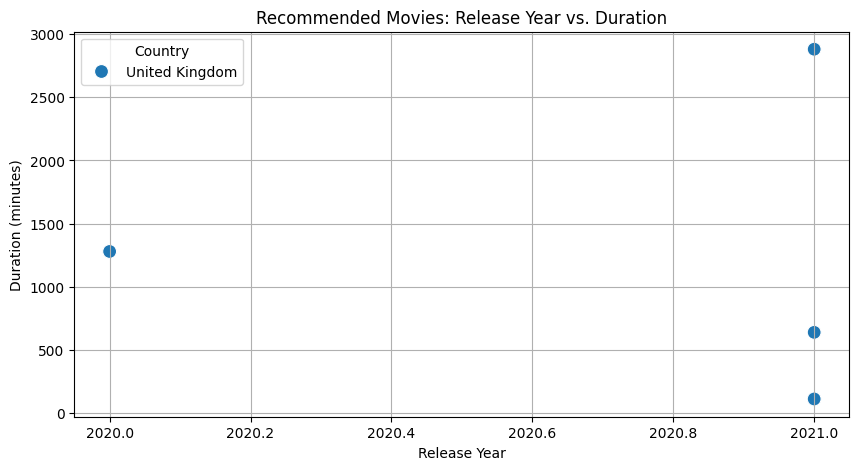

In [39]:
def plot_recommendations(recommendations):
    plt.figure(figsize=(10, 5))

    # Duration vs. Release Year for recommended movies
    sns.scatterplot(data=recommendations, x='Release Year', y='Duration (minutes)', hue='Country', style='Country', s=100)
    plt.title('Recommended Movies: Release Year vs. Duration')
    plt.xlabel('Release Year')
    plt.ylabel('Duration (minutes)')
    plt.legend(title='Country')
    plt.grid()
    plt.show()

plot_recommendations(recommendations)


Summary of Recommendations:
Average Duration (minutes): 1004.8
Number of Unique Countries: 1
Number of Recommendations: 5


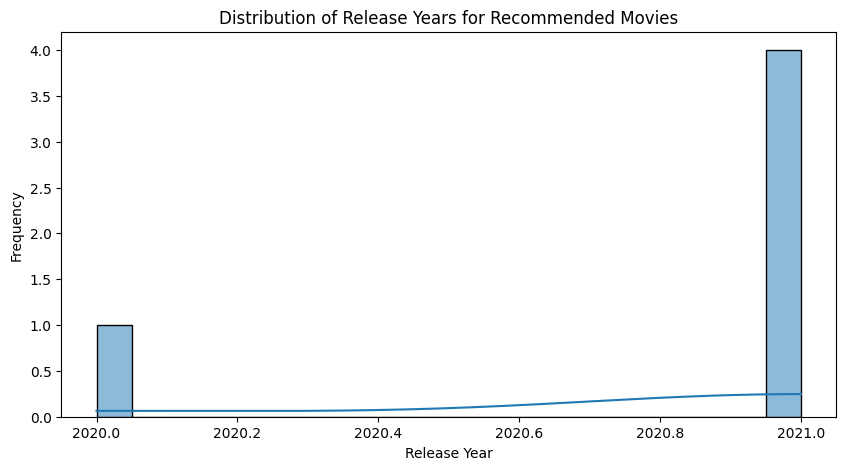

In [40]:
def summarize_recommendations(recommendations):
    print("Summary of Recommendations:")
    print("Average Duration (minutes):", recommendations['Duration (minutes)'].mean())
    print("Number of Unique Countries:", recommendations['Country'].nunique())
    print("Number of Recommendations:", len(recommendations))

    plt.figure(figsize=(10, 5))
    sns.histplot(data=recommendations, x='Release Year', bins=20, kde=True)
    plt.title('Distribution of Release Years for Recommended Movies')
    plt.xlabel('Release Year')
    plt.ylabel('Frequency')
    plt.show()

summarize_recommendations(recommendations)
